In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("students_adaptability_level_online_education.csv")
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [3]:
df.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

# LUCKILY WE HAVE NO NULL VALUES IN OUR DATA.

<Figure size 1000x600 with 0 Axes>

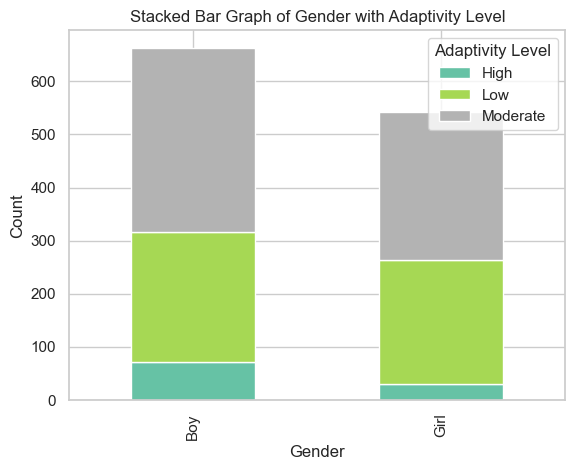

In [4]:
summary_df = df.groupby(['Gender', 'Adaptivity Level']).size().unstack()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


summary_df.plot(kind='bar', stacked=True, colormap="Set2")

plt.title('Stacked Bar Graph of Gender with Adaptivity Level')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# THE AMOUNT OF LOW ADAPTIVITY FOR BOTH THE GENDER SEEMS TO BE ABOUT THE SAME, BUT IT  SEEMS THE BOYS TEND TO HAVE HIGHER ADAPTIVITY COMPARED TO GIRLS.

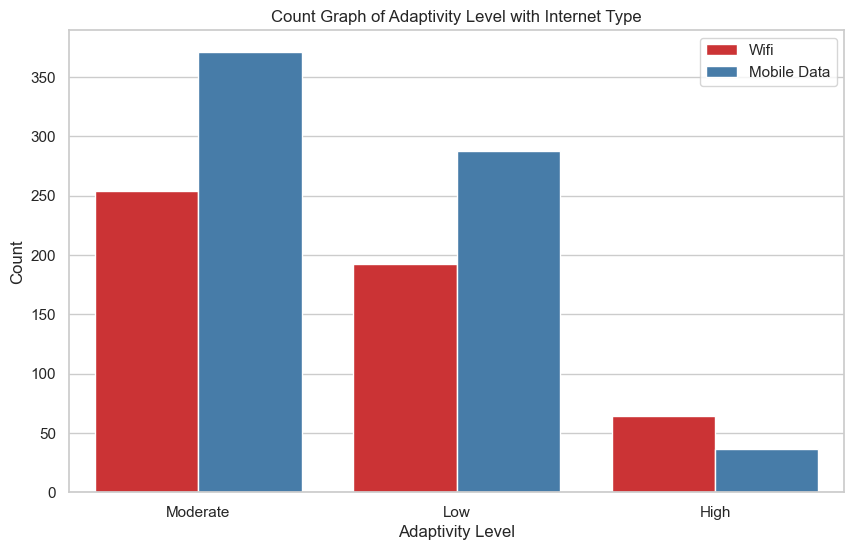

In [5]:


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


sns.countplot(x="Adaptivity Level",hue="Internet Type",data=df,palette='Set1')


plt.title('Count Graph of Adaptivity Level with Internet Type')
plt.xlabel('Adaptivity Level')
plt.ylabel('Count')
plt.legend(loc="upper right")
plt.show()

# IT SEEMS PEOPLE WITH MOBILE DATA SEEM TO BE MORE LIKELY TO HAVE LOW ADAPTIVITY COMPARED TO THOSE WHO USE WIFI. 

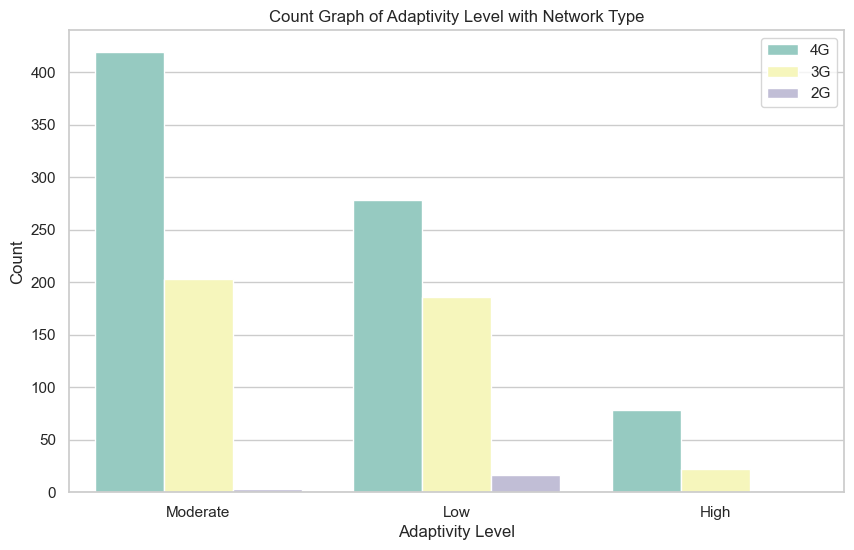

In [6]:
plt.figure(figsize=(10, 6))


sns.countplot(x="Adaptivity Level",hue="Network Type",data=df,palette='Set3')


plt.title('Count Graph of Adaptivity Level with Network Type')
plt.xlabel('Adaptivity Level')
plt.ylabel('Count')
plt.legend(loc="upper right")
plt.show()

# WE MIGHT HAVE FINALLY FOUND SOMETHIMG CONCLUSIVE HERE AS IT SEEMS ALMOST ALL OF THE STUDENTS WHO ARE USING 2G DATA ARE FACING ISSUE ADAPTING TO OUR ONLINE  CLASSES.

<AxesSubplot:xlabel='Adaptivity Level', ylabel='count'>

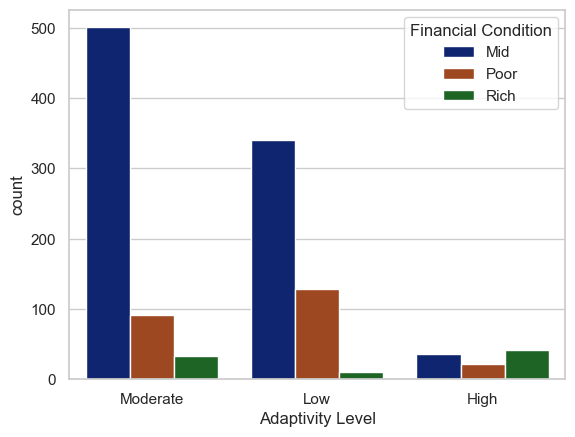

In [7]:
sns.countplot(x="Adaptivity Level",hue="Financial Condition",data=df,palette="dark")

# STUDENTS COMING FROM RICH BACKGROUND HAVE MOST NUMBER WHEN IT COMES TO HIGH ADAPTIVITY DESPITE BEING IN THE MINORITY. 

<AxesSubplot:xlabel='Adaptivity Level', ylabel='count'>

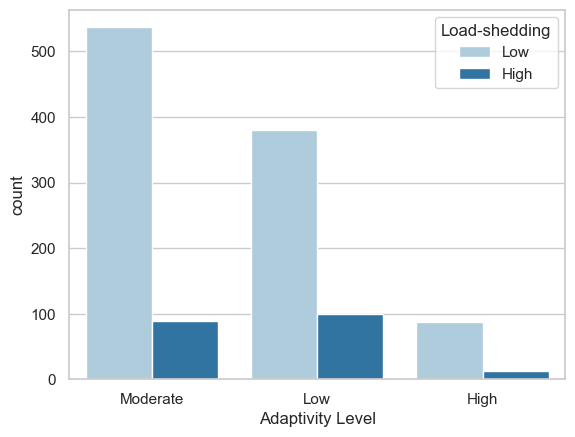

In [8]:
sns.countplot(x="Adaptivity Level",hue="Load-shedding",data=df,palette="Paired")

# ALTHOUGH LOAD SHEDDING IS ONE OF A MAJOR CONCERNS IF YOU ARE ATTENDING ONLINE CLASSES BUT IT SEEMS ABOUT 50% STUDENTS ARE STILL ABLE TO MANAGE. BUT STILL  IT DOES SEEM TO EFFECT THE OTHER 50% STUDENTS QUITE A BIT.

<AxesSubplot:xlabel='Adaptivity Level', ylabel='count'>

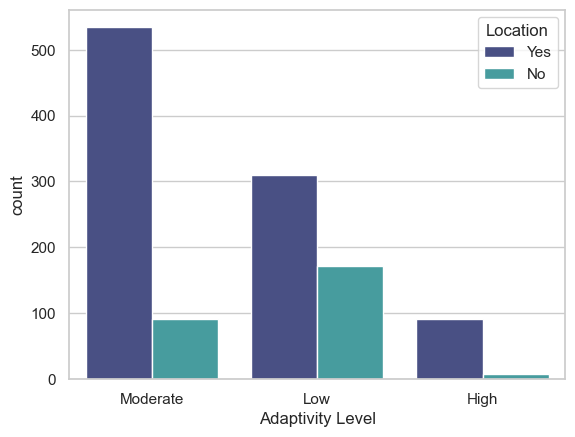

In [9]:
sns.countplot(x="Adaptivity Level",hue="Location",data=df,palette="mako")

# NOT HAVING A PRECISE LOCATION DOES SEEM TO HAVE A NEGATIVE EFFECT ON THE STUDENTS AS WE SEE MAJORITY OF THEM FALLING IN THE LOW ADAPTIVITY CATEGORY.

<AxesSubplot:xlabel='Adaptivity Level', ylabel='count'>

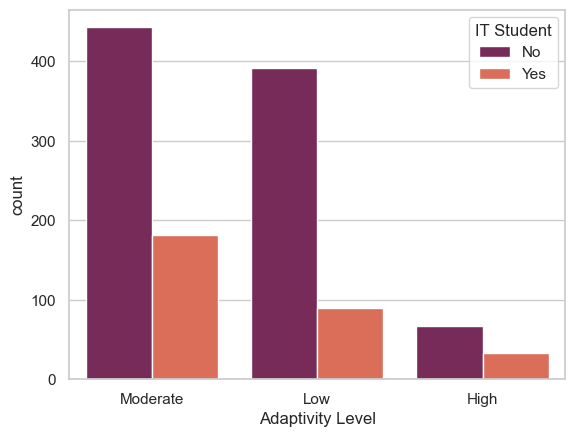

In [10]:
sns.countplot(x="Adaptivity Level",hue="IT Student",data=df,palette="rocket")

# WELL IT DOESN'T SEEM TO MATTER THAT MUCH WHETHER THE STUDENT IS FROM IT OR NOT TO HIS ADAPTIVITY. 

<AxesSubplot:xlabel='Adaptivity Level', ylabel='count'>

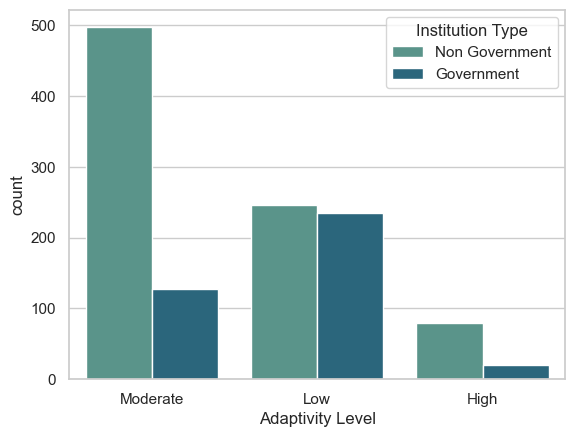

In [11]:
sns.countplot(x="Adaptivity Level",hue="Institution Type",data=df,palette="crest")

# MOST OF THE STUDENTS FROM GOVERNMENT BASED INSTITUTIONS ARE HAVING ISSUES WITH ADAPTIVITY.

<AxesSubplot:xlabel='Adaptivity Level', ylabel='count'>

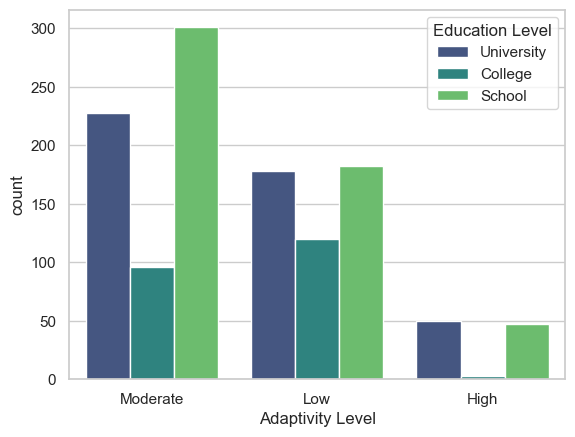

In [12]:
sns.countplot(x="Adaptivity Level",hue="Education Level",data=df,palette="viridis")

# SCHOOL STUDENTS SEEM TO HAVE THE BEST ADAPTIVITY WHILE THE COLLEGE STUDENTS HAVE THE LOWEST.

<AxesSubplot:xlabel='Adaptivity Level', ylabel='count'>

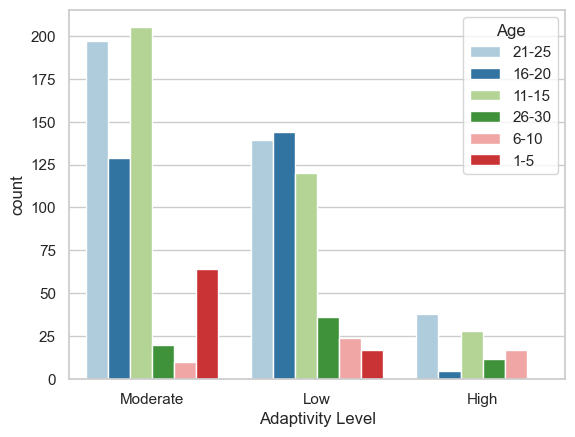

In [13]:
sns.countplot(x="Adaptivity Level",hue="Age",data=df,palette="Paired")

# NONE OF THE CHILDRENS BELOW 5 YEARS OF AGE HAVE HIGH ADAPTIVITY WHILE MAJORITY OF STUDENTS WHO ARE ABOVE THE AGE OF 26 ARE FACING THE PROBLEM OF LOW ADAPTIVITY ALONG WITH STUDENTS WHO FALL UNDER THE AGE GROUP OF (16-20).

# I THNK I FOUND ALL THE NECESSARY INFORMATION I NEEDED FROM THIS DATASET NOW LETS MOVE TO BUILDING A MACHINE LEARNING MODEL TO PREDICT OUR STUDENTS ADAPTIVITY TO ONLINE LECTURES.

<AxesSubplot:ylabel='Adaptivity Level'>

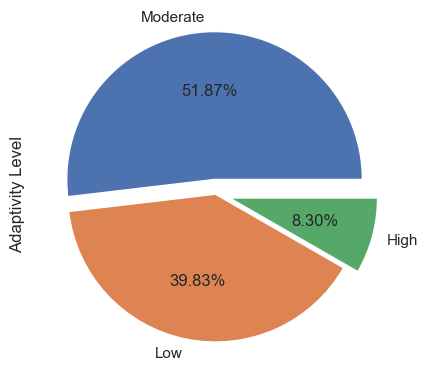

In [14]:
df["Adaptivity Level"].value_counts().plot(kind="pie", autopct='%.2f%%',explode=(0.1,0.,0.1))

# ITS AN UNBALANCED DATASET PARTICULARY FOR THE CATEGORY OF HIGH

In [15]:
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
cat=df.select_dtypes(include=["O"]).columns
for i in cat:
    df[i]=le.fit_transform(df[i])

In [18]:
# ENCODNG OUR DATA SINCE MACHINE CAN ONLY UNDERSTAND NUMBERS.

In [19]:
df

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1,2,0,1,0,1,1,0,1,2,1,0,1,1
1201,1,2,0,1,0,0,0,0,1,2,2,0,1,2
1202,0,1,1,1,0,1,1,0,0,1,1,0,1,2
1203,1,2,0,1,0,0,1,0,1,2,1,0,1,1


In [20]:
#  0 == low
#  1 == Moderate
#  2 == HIGH  

In [21]:
# THERE'S NO NEED TO SCALE OUR DATA SINCE ALL OUR FEATURES AS WELL AS TARGET ARE IN CATEGORY.

In [22]:
X=df.drop("Adaptivity Level",axis=1)
y=df["Adaptivity Level"]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf=RandomForestClassifier()

In [27]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
y_pred=rf.predict(X_test)

In [29]:
from sklearn.metrics import classification_report
classification=classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.91      0.93      0.92       148
           2       0.92      0.93      0.92       183

    accuracy                           0.91       362
   macro avg       0.92      0.88      0.89       362
weighted avg       0.91      0.91      0.91       362



# HUH! IT SEEMS EVEN WITHOUT DEALING WITH AN IMBALANCED DATA BY ADJUSTING WEIGHTS OR UP/DOWN SAMPLING OUR MODEL SEEM TO WORK PRETTY FINE. BUT THERE IS A SLIGHTLY LOW RECALL, MEANING OUR MODEL SEEM TO HAVE A SLIGHT PROBLEM AT DETECTING STUDENTS WITH POOR ADAPTIVITY, WHICH CONTRADICTS WITH THE WHOLE PURPOSE OF BUILDING THIS MODEL.

# NOW WE CAN GO ABOUT IT IN TWO WAYS 
# 1) PERFORM A HYPER PARAMETER TUNING ON THIS MODEL TO FINE TUNE IT.
# 2) LOOK FOR OTHER ML ALGORITHMS.


In [31]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier


In [32]:
xg=XGBClassifier()
svm=SVC()
bag=BaggingClassifier()
ada=AdaBoostClassifier()

In [33]:
a=[xg,svm,bag,ada]

In [34]:
for i in a:
    i.fit(X_train,y_train)
    y_pred=i.predict(X_test)
    print(i)
    print(i,classification_report(y_test,y_pred))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=

# WELL BAGGING CLASSIFIER SEEM TO HAVE DONE PRETTY WELL IN ALL ASPECTS BUT LETS AIM MORE PERFECTION.

In [71]:
from sklearn.model_selection import GridSearchCV,KFold,StratifiedKFold

In [89]:
Grid= {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

 

In [53]:
cv=KFold(n_splits=10)

In [54]:
Grid_rf=GridSearchCV(rf,param_grid=Grid,cv=cv,scoring="recall")

In [56]:
Grid_rf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='recall')

In [57]:
y_pred=Grid_rf.predict(X_test)
print(classification_report(y_test,y_pred))
                           
                           
                           
                           
                           
                        

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.91      0.91      0.91       148
           2       0.91      0.93      0.92       183

    accuracy                           0.91       362
   macro avg       0.91      0.88      0.89       362
weighted avg       0.91      0.91      0.91       362



In [58]:
Grid_rf.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

<AxesSubplot:>

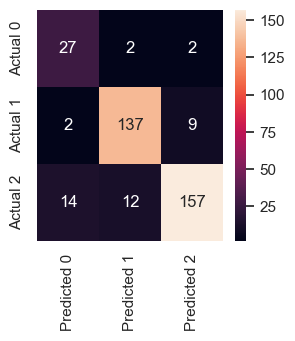

In [110]:
plt.figure(figsize=(3,3))
sns.heatmap(cm,annot=True,fmt='d', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])

# WELL A HYPERPARAMETER DID INCREASE OUR MODELS RECALL BY 4%. NOW LETS SEE HOW IT WORKS FOR BAGGING CLASSIFIER AND IF WE CAN INCREASE THAT ANY MORE.

In [70]:
Grid= {
'n_estimators': [10, 50, 100],
    'max_samples': [0.5,0.7, 0.8, 1.0],
    'max_features': [0.5,0.7, 0.8, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False] }


In [80]:
cv=KFold(n_splits=10)

In [81]:
Grid_bag=GridSearchCV(bag,param_grid=Grid,cv=cv,scoring="f1")

In [82]:
Grid_bag.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=BaggingClassifier(),
             param_grid={'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 0.7, 0.8, 1.0],
                         'max_samples': [0.5, 0.7, 0.8, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='f1')

In [85]:
y_pred=Grid_bag.predict(X_test)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.16      0.28        31
           1       0.81      0.62      0.70       148
           2       0.67      0.89      0.77       183

    accuracy                           0.72       362
   macro avg       0.83      0.56      0.58       362
weighted avg       0.75      0.72      0.70       362



In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm,annot=True,fmt='d', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])

# OH WOW IT ACTUALLY MADE OUR MODEL WORSE....

In [87]:
Grid_bag.best_params_

{'bootstrap': True,
 'bootstrap_features': True,
 'max_features': 0.5,
 'max_samples': 0.5,
 'n_estimators': 10}

# P.S I ALSO TRIED STRATIFIED K FOLD SINCE ITS SUPPOSED TO WORK WELL ON IMBALANCED DATA BUT THE RESULT WASN'T ANY BETTER, SO FOR NOW LETS FOCUS ON OUR BEST PERFORMING ALGORITHM RANDOM FOREST. 

# LETS TRY ADJUSTING WEIGHTS, GOOD THING THAT RANDOM FOREST ALREADY PROVIDES A PARAMETER FOR THAT SO NO NEED TO IMPORT ANY LIBRARIES.

In [90]:
rfc=RandomForestClassifier(class_weight="balanced")
Grid= {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

cv=KFold(n_splits=5)

 

In [96]:
Grid_rf_wt=GridSearchCV(rfc,param_grid=Grid,scoring="f1",n_jobs=-1)

In [97]:
Grid_rf_wt.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [98]:
y_pred=Grid_rf_wt.predict(X_test)

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.87      0.73        31
           1       0.91      0.93      0.92       148
           2       0.93      0.86      0.89       183

    accuracy                           0.89       362
   macro avg       0.82      0.88      0.85       362
weighted avg       0.90      0.89      0.89       362



# WELL THAT DID'NT DO US ANY GOOD  AS ALTHOUGHT IT MIGHT HAVE INCREASED OUR RECALL SIGNIFICANTLY BUT THE PRECISION AND F1-SCORE IS DOWN SIGNIFICANTLY.

In [101]:
from sklearn.metrics import confusion_matrix

In [104]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 27,   2,   2],
       [  2, 137,   9],
       [ 14,  12, 157]], dtype=int64)

<AxesSubplot:>

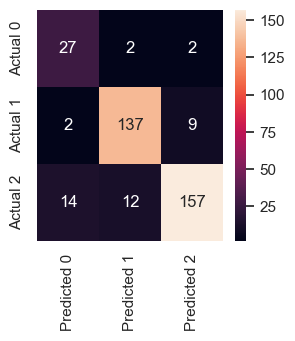

In [109]:
plt.figure(figsize=(3,3))
sns.heatmap(cm,annot=True,fmt='d', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])

# I THINK WE HA GOTTEN OUR BEST MODEL WHICH IS RANDOM FOREST AFTER HYPER PARAMETER TUNING BUT LET,S TRY USING NEURAL NETWORKS FOR ONCE AND SEE HOW IT PERFORMS.

In [117]:
import tensorflow as tf

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [128]:
model=Sequential()
model.add(Dense(64,input_dim=X_train.shape[1],activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [144]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


In [149]:
model.fit(X_train,y_train,epochs=120,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/120
27/27 [==============================] - 0s 11ms/step - loss: 0.2072 - accuracy: 0.9158 - val_loss: 0.3137 - val_accuracy: 0.8895
Epoch 2/120
27/27 [==============================] - 0s 9ms/step - loss: 0.1952 - accuracy: 0.9146 - val_loss: 0.3204 - val_accuracy: 0.8950
Epoch 3/120
27/27 [==============================] - 0s 8ms/step - loss: 0.1934 - accuracy: 0.9229 - val_loss: 0.3121 - val_accuracy: 0.8923
Epoch 4/120
27/27 [==============================] - 0s 9ms/step - loss: 0.1873 - accuracy: 0.9241 - val_loss: 0.3094 - val_accuracy: 0.8923
Epoch 5/120
27/27 [==============================] - 0s 9ms/step - loss: 0.1861 - accuracy: 0.9253 - val_loss: 0.3323 - val_accuracy: 0.8950
Epoch 6/120
27/27 [==============================] - 0s 10ms/step - loss: 0.1950 - accuracy: 0.9217 - val_loss: 0.3127 - val_accuracy: 0.8923
Epoch 7/120
27/27 [==============================] - 0s 11ms/step - loss: 0.1888 - accuracy: 0.9134 - val_loss: 0.3095 - val_accuracy: 0.8950
Epoch 8/12

Epoch 59/120
27/27 [==============================] - 0s 9ms/step - loss: 0.1840 - accuracy: 0.9134 - val_loss: 0.2982 - val_accuracy: 0.9061
Epoch 60/120
27/27 [==============================] - 0s 9ms/step - loss: 0.1937 - accuracy: 0.9253 - val_loss: 0.3131 - val_accuracy: 0.9116
Epoch 61/120
27/27 [==============================] - 0s 9ms/step - loss: 0.1744 - accuracy: 0.9217 - val_loss: 0.2961 - val_accuracy: 0.9088
Epoch 62/120
27/27 [==============================] - 0s 9ms/step - loss: 0.1710 - accuracy: 0.9241 - val_loss: 0.3016 - val_accuracy: 0.9061
Epoch 63/120
27/27 [==============================] - 0s 9ms/step - loss: 0.1646 - accuracy: 0.9158 - val_loss: 0.2913 - val_accuracy: 0.9116
Epoch 64/120
27/27 [==============================] - 0s 9ms/step - loss: 0.1647 - accuracy: 0.9276 - val_loss: 0.3115 - val_accuracy: 0.9116
Epoch 65/120
27/27 [==============================] - 0s 8ms/step - loss: 0.1744 - accuracy: 0.9276 - val_loss: 0.2943 - val_accuracy: 0.9116
Epoch 

27/27 [==============================] - 0s 9ms/step - loss: 0.1530 - accuracy: 0.9371 - val_loss: 0.3007 - val_accuracy: 0.9088
Epoch 117/120
27/27 [==============================] - 0s 8ms/step - loss: 0.1747 - accuracy: 0.9217 - val_loss: 0.3215 - val_accuracy: 0.8895
Epoch 118/120
27/27 [==============================] - 0s 8ms/step - loss: 0.1726 - accuracy: 0.9217 - val_loss: 0.2990 - val_accuracy: 0.9116
Epoch 119/120
27/27 [==============================] - 0s 9ms/step - loss: 0.1648 - accuracy: 0.9158 - val_loss: 0.2941 - val_accuracy: 0.9116
Epoch 120/120
27/27 [==============================] - 0s 9ms/step - loss: 0.1591 - accuracy: 0.9193 - val_loss: 0.2829 - val_accuracy: 0.9088


In [150]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

12/12 [==============================] - 0s 4ms/step - loss: 0.2829 - accuracy: 0.9088
Test Accuracy: 0.9088


12/12 [==============================] - 0s 4ms/step


<AxesSubplot:>

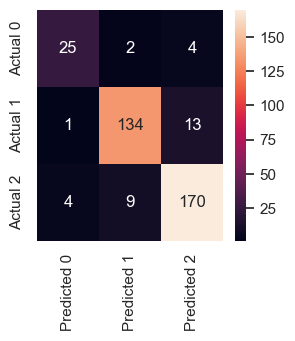

In [153]:
y_pred_prob=model.predict(X_test)
y_pred_class = np.argmax(y_pred_prob, axis=1)

# Generate a confusion matrix
cm= confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(3,3))
sns.heatmap(cm,annot=True,fmt='d', xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'], yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])

In [155]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.92      0.91      0.91       148
           2       0.91      0.93      0.92       183

    accuracy                           0.91       362
   macro avg       0.89      0.88      0.88       362
weighted avg       0.91      0.91      0.91       362



# IT DID A PRETTY DECENT JOB I WOULD SAY.

# NOW LETS CONVERT OUR TWO BEST WORKING MODELS INTO A PICKLE FILE.

In [161]:

import joblib

In [163]:
joblib.dump(model,"ANN.joblib")

['ANN.joblib']

In [164]:
joblib.dump(Grid_rf,"grid_rf.joblib")

['grid_rf.joblib']

In [165]:
model.save('ann.h5')